In [ ]:
#Read in local raw data generated from WRDS data, all nulls removed, 12k observations and 46 variables left
from google.colab import files
#upload csv file
uploaded = files.upload()

Saving CleanedFinancialData.csv to CleanedFinancialData.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import io
class GB_Machine:

    def __init__(self, train_x, train_y, test_x, test_y, params={'n_estimators': 30,'max_depth': 15,'min_samples_split': 5,'learning_rate': 0.1,'loss': 'ls'}):          
       # self.Cs = Tunning_Cs
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x        
        self.test_y = test_y
        self.params = params
        self.model = ensemble.GradientBoostingRegressor(**self.params)

    def training(self):
        """
            Function to train the model
        """
        self.model.fit(self.train_x, self.train_y)


    def predict(self):
        """
            Function to predict y_hat using the trained model
        """        
        return self.model.predict(self.test_x)


        


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['CleanedFinancialData.csv'].decode('utf-8')))
df=df.dropna(axis=1)
df.drop(['X','permno','fyear','sic2', 'age', 'spii','woGW','sin','securedind','convind','credrat_dwn','EXCHCD','DLRET','eamonth','nanalyst','ltg','i','j','count','Unnamed: 0','IPO','grGW','divi','divo','rd','ms','retcons_pos','retcons_neg','nincr'], axis=1, inplace=True) 
df.loc[:, 'DATE'] = pd.to_datetime(df['DATE'],format='%m/%d/%Y')
pd.set_option('display.max_columns', None)
df = df.sort_values(by=['gvkey','DATE'])
pd.set_option('display.max_rows', None)
#a1=set(dict.fromkeys(df[df.DATE == '2015-8-31'].gvkey))
#a2=set(dict.fromkeys(df[df.DATE == '2015-9-30'].gvkey))
#a3=set(dict.fromkeys(df[df.DATE == '2017-2-28'].gvkey))
#a4=set(dict.fromkeys(df[df.DATE == '2017-3-31'].gvkey))
#a5=set(dict.fromkeys(df[df.DATE == '2017-4-28'].gvkey))
#a6=set(dict.fromkeys(df[df.DATE == '2017-5-31'].gvkey))
#a7=set(dict.fromkeys(df[df.DATE == '2017-6-30'].gvkey))
#a8=set(dict.fromkeys(df[df.DATE == '2018-12-31'].gvkey))
#a9=set(dict.fromkeys(df[df.DATE == '2019-1-31'].gvkey))
#set.difference(set(dict.fromkeys(df.gvkey)),set.intersection(a1,a2,a3,a4,a5,a6,a7,a8,a9))
df1=df[df.DATE > '2014-8-31']
df1=df1[df.DATE < '2019-2-1']
df1=df1[df.gvkey != 3310]
df1=df1[df.gvkey != 10984]
df1=df1[df.gvkey != 24782]


#train and test
df1 = df1.sort_values(by=['DATE','gvkey'])
df_train = df1[df1.DATE < '2018-3-1']
df_test = df1[df1.DATE > '2018-1-31']
y_train = df_train[(df_train.DATE > '2015-8-1') & (df_train.DATE < '2018-2-1')].RET
X_train = df_train[(df_train.DATE > '2015-8-1') & (df_train.DATE < '2018-2-1')].drop(['gvkey','RET','DATE'], axis=1)
y_test = df_test.RET
X_test = df_test.drop(['gvkey','RET','DATE'], axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
model = GB_Machine(X_train, y_train, X_test, y_test, params={'n_estimators': 30,'max_depth': 15,'min_samples_split': 5,'learning_rate': 0.1,'loss': 'ls'})  

In [6]:
model.training()    
y_hat = model.predict()


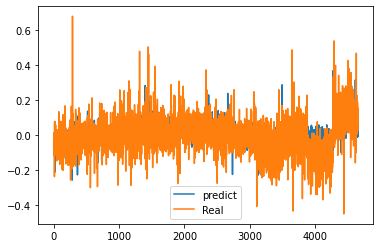

In [7]:
plt.plot(range(len(y_hat)), y_hat, label='predict')
plt.plot(range(len(y_hat)) , y_test, label='Real')    
plt.legend()
